# Lab 6: Function Approximation

## Preliminaries 

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize, minimize_scalar
import warnings
# Stop divide by zero warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


### Problem 1
Consider the following five functions

\begin{align*}
f_1(x) &= \exp(2x + 2) & x \in [-1, 1] \\
f_2(x) &= \min \left( \max \left[ -1,4 \left( \frac{x - 1}{5} \right) \right], 1 \right) & x \in [-1, 1] \\
f_3(x) &= -2x^{\frac{1}{2}} & x \in [0, 1] \\
f_4(x) &= \frac{1}{1 + x^2} & x \in [-5, 5]
\end{align*}


### Part A 
Approximate each of these functions with Chebyshev polynomials, Lagrange polynomials, linear interpolation, and cubic splines1
. Try a variety of grid sizes (n = 5, 10, 20, 50, 100) and plot the resulting
approximations against the true function. Plot the approximation error f− ˆf over the relevant domains.
How well do the methods seem to be working?

### Chebyshev Polynomials

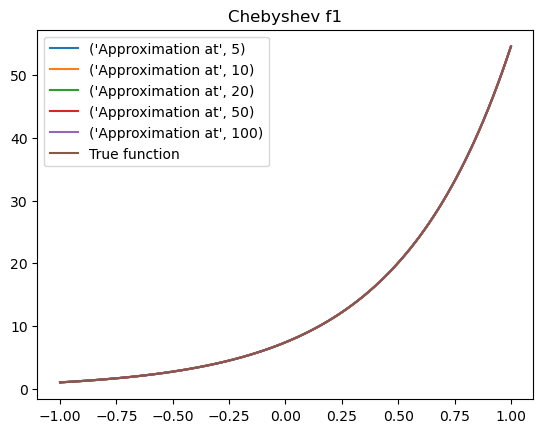

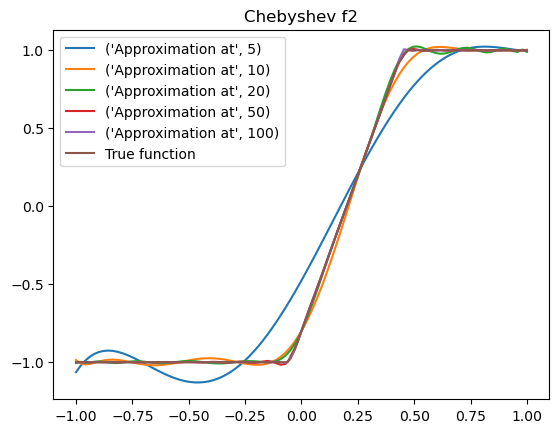

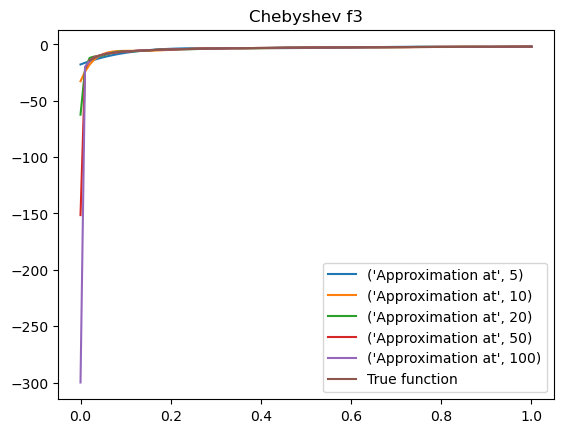

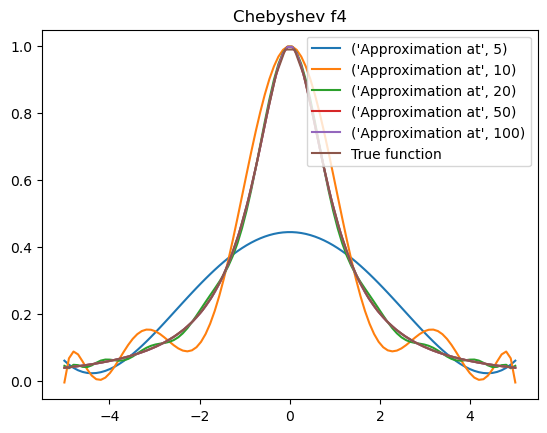

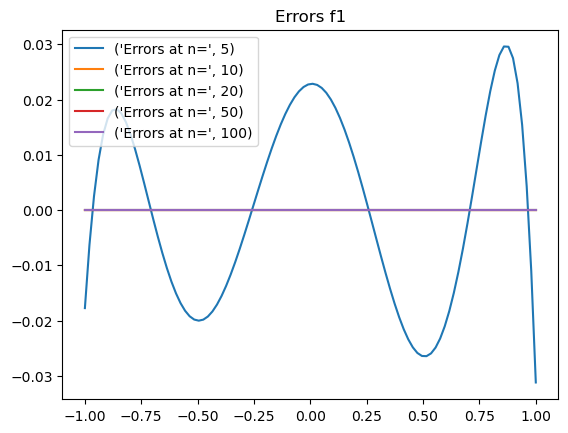

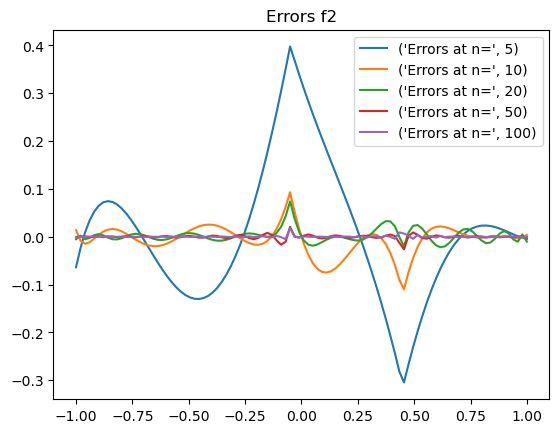

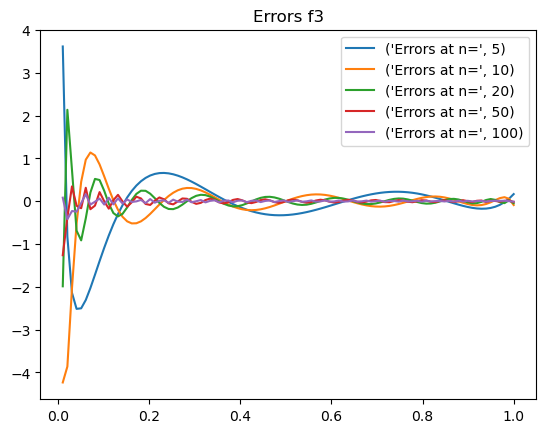

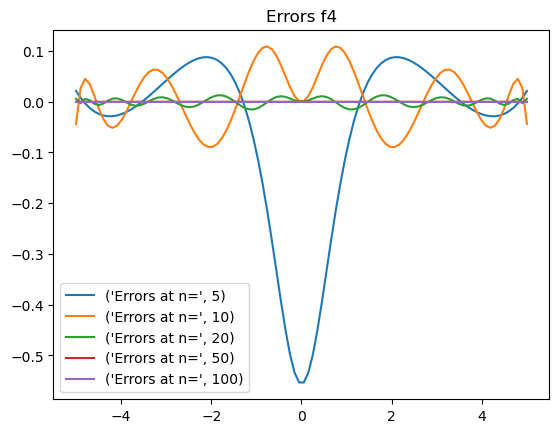

<Figure size 640x480 with 0 Axes>

In [96]:
def chebyshev_interpolation(f, n, a, b):
    """
    Computes the Chebyshev interpolation of a function f on the interval [a, b] using n+1 Chebyshev nodes.
    f:is a callable function
    n: is an integer
    a,b: are integers
    """
    m  = n + 1
    def T(n, x):
        return np.cos(n * np.arccos(x))
    ##Define z
    # Compute Chebyshev nodes on [-1, 1]
    zk = [-np.cos((2*k - 1) * np.pi / (2 * m)) for k in range(1, m+1)] 
    # Adjust nodes to [a, b]
    xk = (np.array(zk) + 1) * (b - a) / 2 + a
    # Evaluate function at nodes
    yk = f(xk)
    # Compute Chebyshev coefficients
    c  = []
    for i in range(n+1):
        # Calculate numerator and denominator
        num = np.sum(yk * np.cos(i * np.arccos(zk)), axis=0)
        den = np.sum(np.cos(i * np.arccos(zk))**2, axis=0)
        c.append(num / den)
    # Construct the approximation
    # Evaluate the approximation using a loop and the zip function
    f_hat   = lambda x: sum([c[i] * T(i, 2 * (x - a) / (b - a) - 1) for i in range(n+1)])
    return f_hat


# Define the functions to be interpolated

def f1(x):
    return np.exp(2*x + 2)

def f2(x):
    return np.minimum(np.maximum(-1, 4*(x-1/5)), 1)

def f3(x):
    return -2*x**(-(1/2))


def f4(x):
    return 1/(1+x**2)

nvals     = [5,10,20,50,100]
functions = [f1, f2, f3, f4]
xvals     = [[-1,1],[0,1],[-5,5]]
avals     = [-1,-1,0,-5]
bvals     = [1,1,1,5]
n_points=100
# Run a the chebyshev function through a loop for each of the 4 functions, including different values of n and a/b.
for func, a, b in zip(functions, avals, bvals):
    for n in nvals:
        f_hat  = chebyshev_interpolation(func, n, a, b)
        x_test = np.linspace(a, b, n_points)
        x_true =np.linspace(a,b)
        y_true = func(x_true)
        y_hat  = f_hat(x_test)
        
        plt.plot(x_test, y_hat, label=("Approximation at",n))
        
        plt.legend()
        
        if n   == nvals[-1]:
            plt.plot(x_true, y_true, label="True function")
            plt.title(f"Chebyshev {func.__name__}")
            plt.legend()
            plt.figure()
            
#Calculate errors by running loop again and caluclating y_hat-y_true, and plotting results
for func, a, b in zip(functions, avals, bvals):
    for n in nvals:
        f_hat  = chebyshev_interpolation(func, n, a, b)
        x_test = np.linspace(a, b, 100)
        x_true =np.linspace(a,b,100)
        y_true = func(x_true)
        y_hat  = f_hat(x_test)
        errors =y_hat-y_true
        plt.plot(x_test,errors, label=("Errors at n=",n))
        plt.title(f"Errors {func.__name__}")
        plt.legend()
        if n   == nvals[-1]:
            plt.figure()                 
       
            


### Chebyshev Comment:
Chebyshev polynomials do a good job at approximating the functions. Specifically, the graph 'Chebyshev f1' shows very little variation with different values of n. Even given n=5, the approximation is good. Hence, all the lines for the different values of n appear aligned on top of each other. For graph 'Chebyshev f2', the approximation works well for when n=10 and above - even at n=5 the approximation follows the general trend. This analysis is confirmed by the error approximations, which shows for all 4 functions that as n increases, the size of the errors decrease. At n=100, the errors are almost zero for each function. Note, for graph "errors f2" the errors for n=10,20,50 are beneath the line for n=100.


### Part 1A - Lagrangian Polynomials

-1 1 5 <function f1 at 0x7f855dce6b80>
-1 1 10 <function f1 at 0x7f855dce6b80>
-1 1 20 <function f1 at 0x7f855dce6b80>
-1 1 50 <function f1 at 0x7f855dce6b80>
-1 1 100 <function f1 at 0x7f855dce6b80>
-1 1 5 <function f2 at 0x7f855daf9820>
-1 1 10 <function f2 at 0x7f855daf9820>
-1 1 20 <function f2 at 0x7f855daf9820>
-1 1 50 <function f2 at 0x7f855daf9820>
-1 1 100 <function f2 at 0x7f855daf9820>
1e-16 1 5 <function f3 at 0x7f855daf93a0>
1e-16 1 10 <function f3 at 0x7f855daf93a0>
1e-16 1 20 <function f3 at 0x7f855daf93a0>
1e-16 1 50 <function f3 at 0x7f855daf93a0>
1e-16 1 100 <function f3 at 0x7f855daf93a0>
-5 5 5 <function f4 at 0x7f855c1f4940>
-5 5 10 <function f4 at 0x7f855c1f4940>
-5 5 20 <function f4 at 0x7f855c1f4940>
-5 5 50 <function f4 at 0x7f855c1f4940>
-5 5 100 <function f4 at 0x7f855c1f4940>


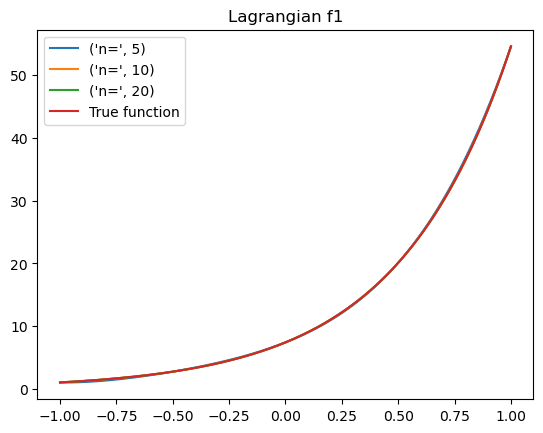

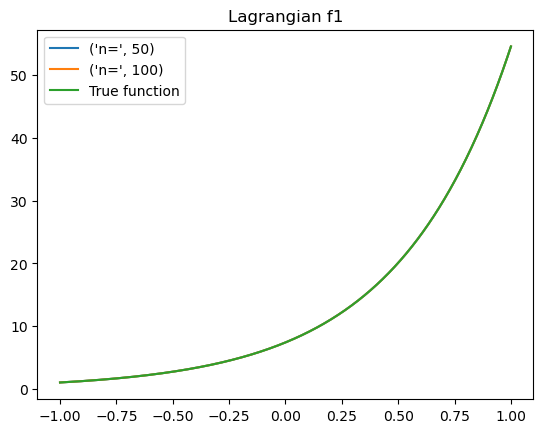

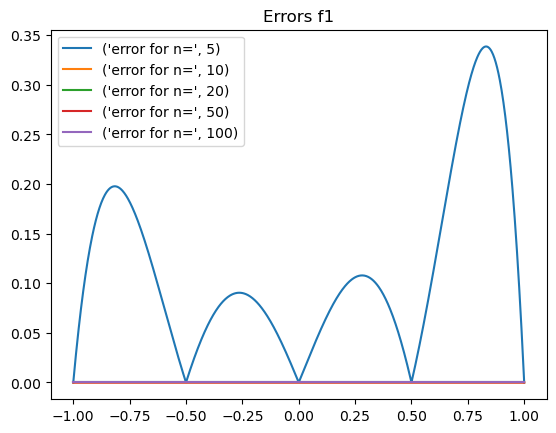

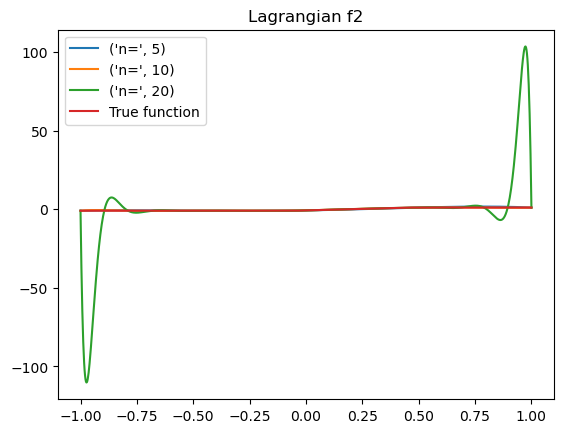

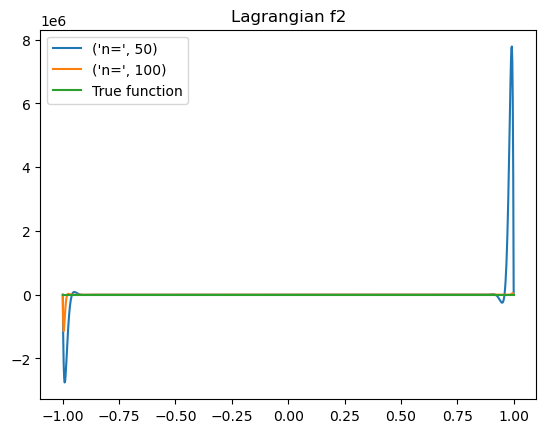

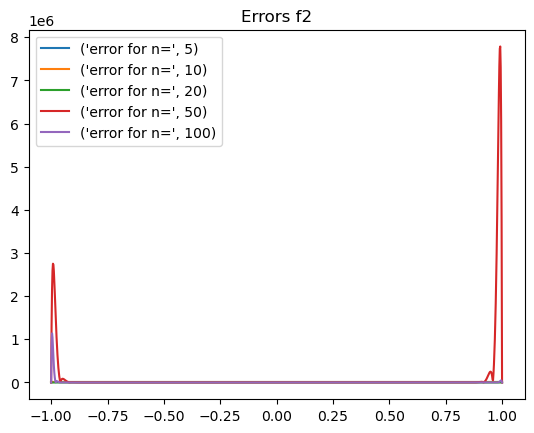

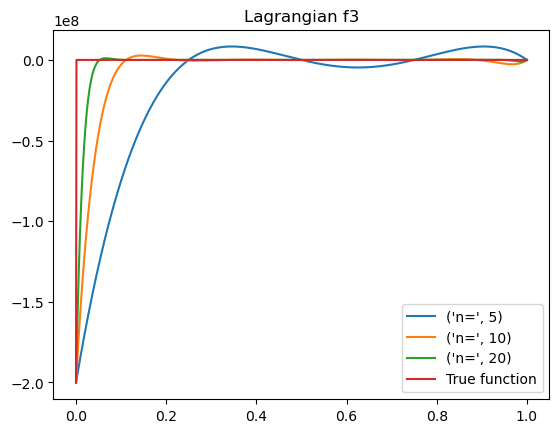

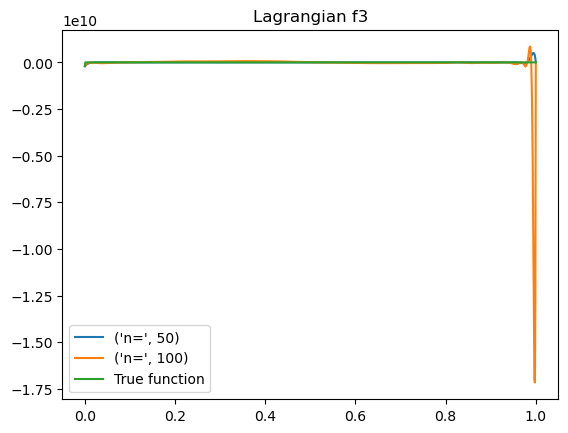

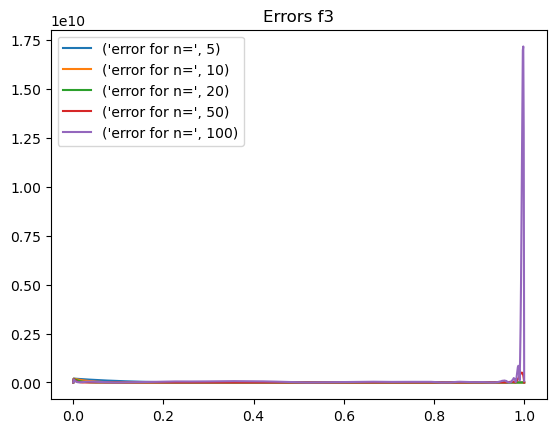

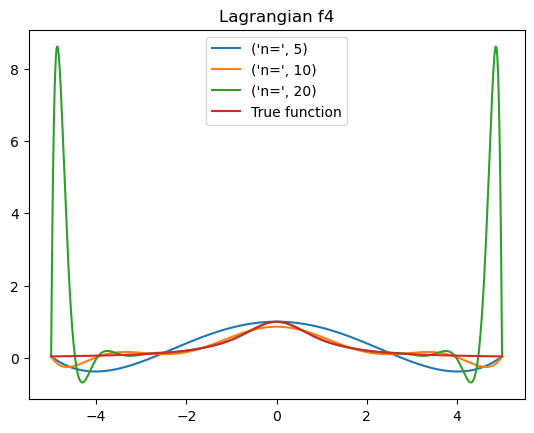

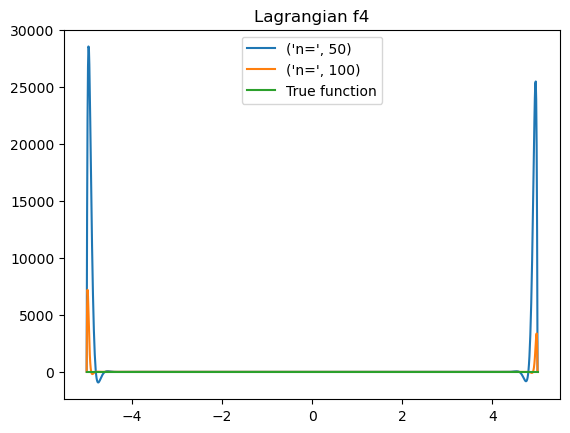

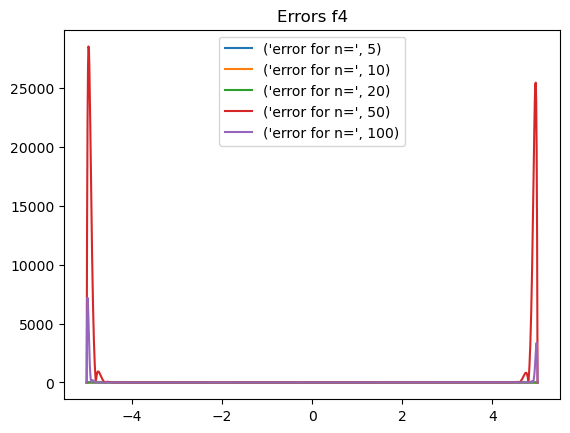

<Figure size 640x480 with 0 Axes>

In [123]:
#Define Vandemorde matrix
def vandermode(x):
    vandermodevals = []
    for i in x:
        for j in range(len(x)):
            xi = i**j
            vandermodevals.append(xi)
    vandermodevals = np.array(vandermodevals).reshape(len(x),len(x))
    return vandermodevals
#Solve for vector A
def lagrangesolver(X, y):
    V = vandermode(X)
  
    A = np.linalg.solve(V, y)
    return A
#Evaluate the lagrange function with A
def evaluate(A, x):
    v = np.zeros_like(x)
    xi = np.ones_like(x)
    for ai in A:
        v += ai * xi
        xi = np.multiply(xi, x)
        
    return v

nvals = [5,10,20,50,100]
functions = [f1,f2, f3,f4]
avals = [-1,-1,1e-16,-5]
bvals = [1,1,1,5]

#Run through loop to solve for all 4 functions and plot errors as well
for func, a, b in zip(functions, avals, bvals):
    errors = []
    for n in nvals:
        print (a,b,n,func)
        x = np.linspace(a,b, n)
        A = lagrangesolver(x, func(x))
        xg = np.linspace(a,b,1000)
        plt.plot(xg, evaluate(A,xg), label = ('n=', n))
        error = np.abs(evaluate(A,xg) - func(xg))
        errors.append(error)
        if n == 20:
            plt.plot(xg,func(xg), label = "True function")
            plt.title(f"Lagrangian {func.__name__}")
            plt.legend()
            plt.figure()
        elif n == nvals[-1]:
            plt.plot(xg,func(xg), label="True function")
            plt.title(f"Lagrangian {func.__name__}")

            plt.legend()
            plt.figure()

            for i,n in zip(errors,nvals):
                plt.plot(xg,i, label = ('error for n=',n))
                plt.title(f"Errors {func.__name__}")
                plt.legend()
            plt.figure()
 



### Lagrangian Comment:
For each of the functions, we plot the approximations seperately for n=5,10,20 and n=,50,100. This is due to the fact that f3 and f4 suffer from the runge phenomenon, and so plotting for all n on the same graph makes it difficult to interpret. The runge phenomenon causes the approximation to oscillate around the true values, with the oscillations increasing in size as n increases. Hence, for large n, the scale of the x axis increases signigificantly, making plotting all n infeasible on the same graph.
Now lets consider the error approximations. f1 is approximated well by this method, hence the error size decreases as n increases, as seen in the graph 'errors f1'. In f2, the errors are small apart from for n=50,100, which is evidence of the Runge phenomenon. This is similar to  both f3 and f4, which has small errors apart from n=100, once again evidence of the runge phenomenon.
Overall, we find that the lagrangian polynomials are not an effective method of function approximation.

### Part 1A Linear Interpolation

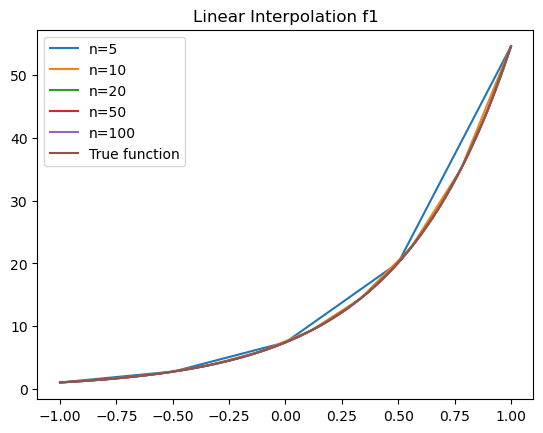

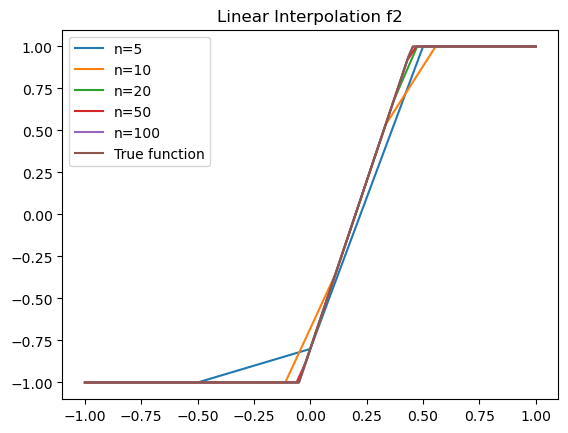

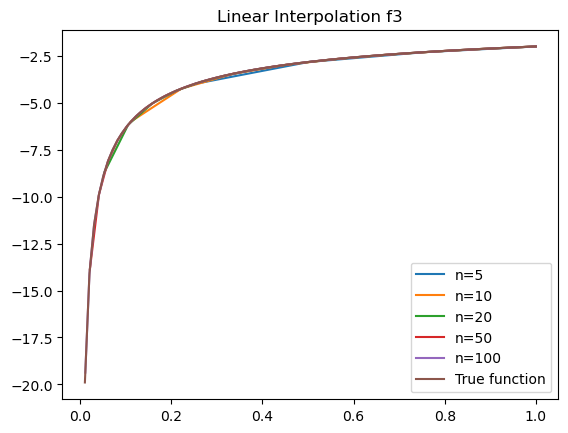

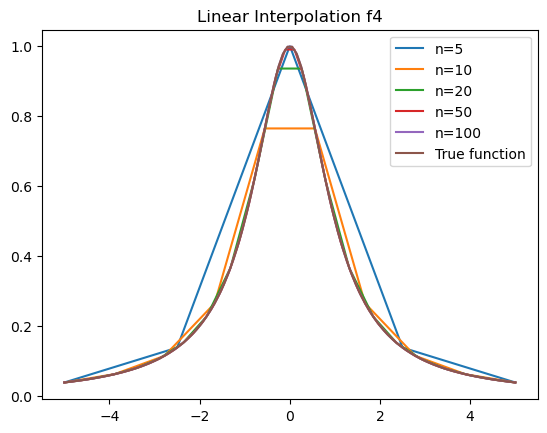

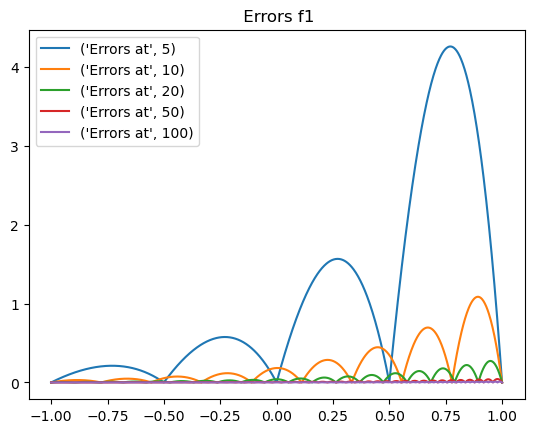

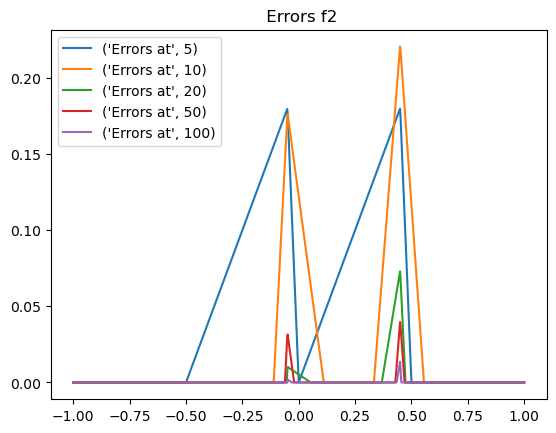

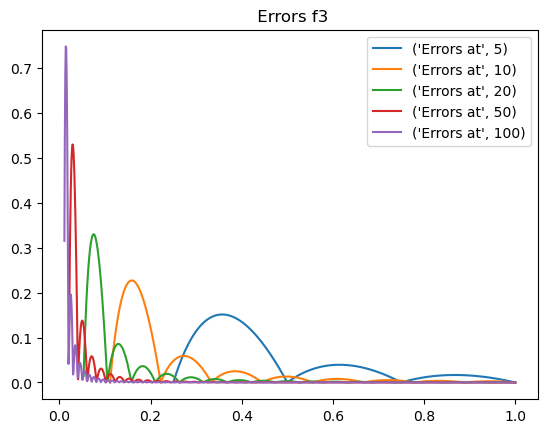

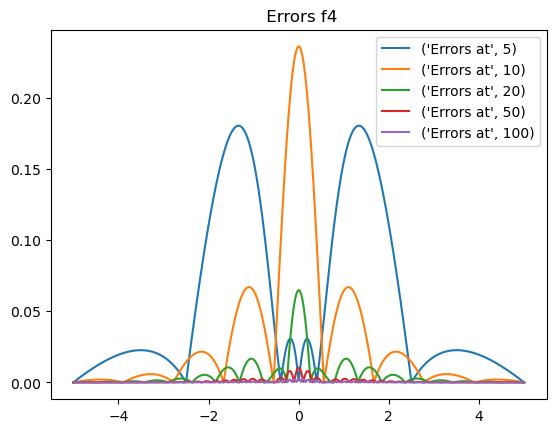

<Figure size 640x480 with 0 Axes>

In [110]:

nvals     = [5,10,20,50,100]
functions = [f1, f2, f3, f4]
xvals     = [[-1,1],[0,1],[-5,5]]
avals     = [-1,-1,0,-5]
bvals     = [1,1,1,5]

n_points=100
# Run a  a loop for each of the 4 functions, including different values of n and a/b.
for func, a, b in zip(functions, avals, bvals):
    for n in nvals:
        x=np.linspace(a,b,n)
        y=func(x)
        xg = np.linspace(a,b,1000)

        x_interp=np.linspace(a,b,n)
        y_interp=np.interp(xg,x_interp,func(x))
        plt.plot(xg,y_interp, label=f'n={n}')
        plt.title(f"Linear Interpolation {func.__name__}")
        plt.legend()
        
        if n   == nvals[-1]:
            plt.plot(x, y, label="True function")
            plt.title(f"Linear Interpolation {func.__name__}")
            plt.legend()
            plt.figure()
            
#Run a loop to calculate error approximations

for func, a, b in zip(functions, avals, bvals):
    for n in nvals:
        x=np.linspace(a,b,n)
        xg = np.linspace(a,b,1000)
        y=func(xg)
        x_interp=np.linspace(a,b,n)
        y_interp=np.interp(xg,x_interp,func(x))
        errors=np.abs(y-y_interp)
        plt.plot(xg, errors, label=("Errors at",n))
        plt.title(f" Errors {func.__name__}")
        plt.legend()
        
        if n   == nvals[-1]:
            plt.figure()

### Linear Interpolation Comment:
Overall, we find that the linear interpolation is effective at converging to the true values of the function, becoming increasingly accurate as n increases. The approximation errors converge to almost zero as n=1 for f1,f3, and f4. 

### Part 1A Cubic Splines

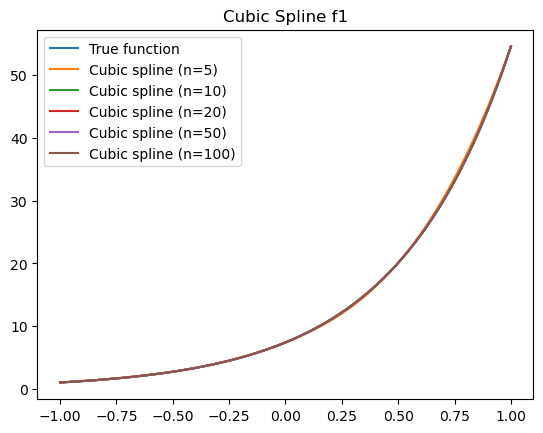

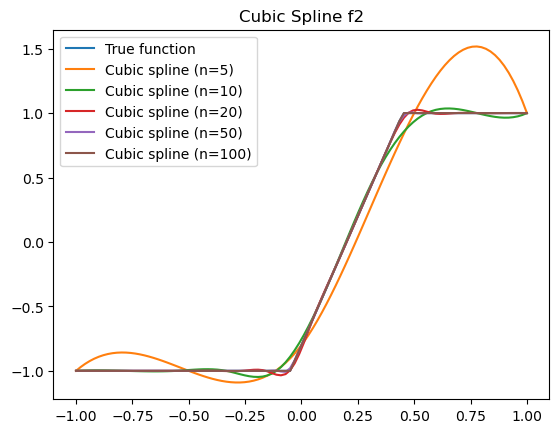

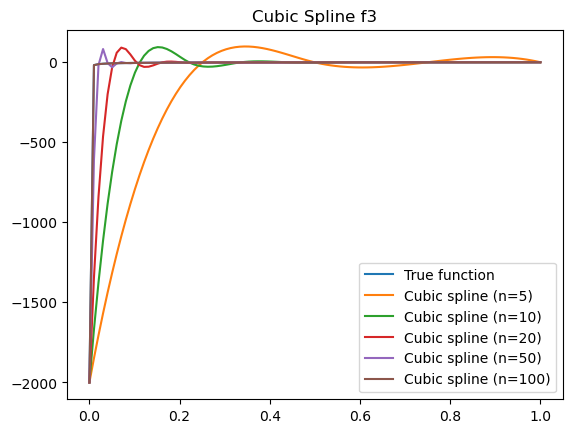

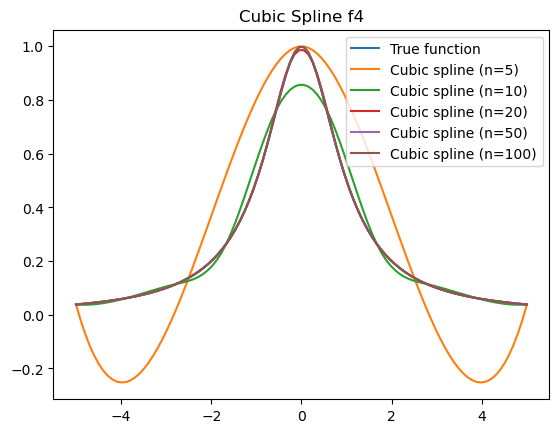

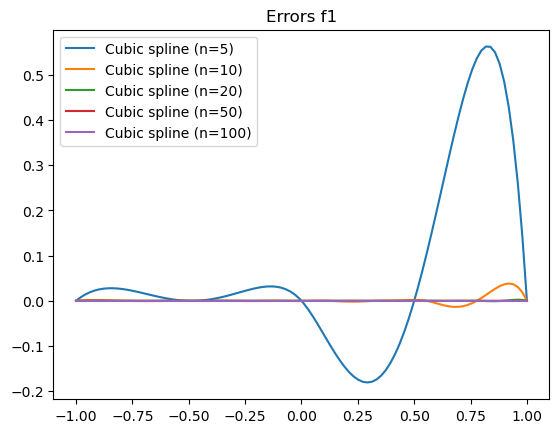

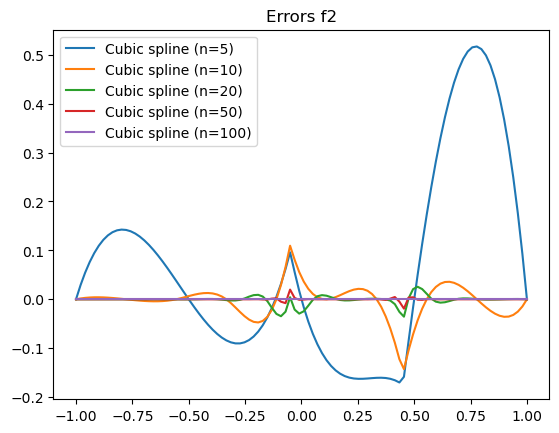

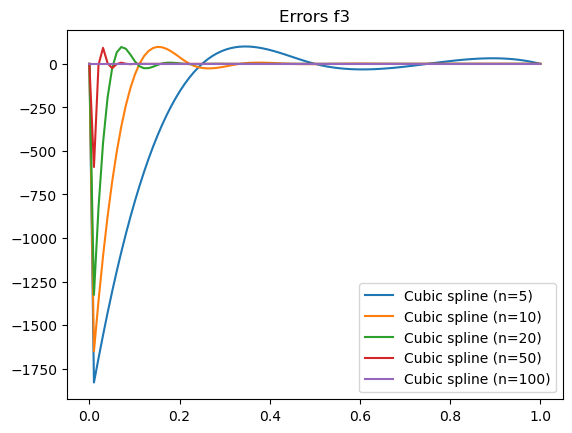

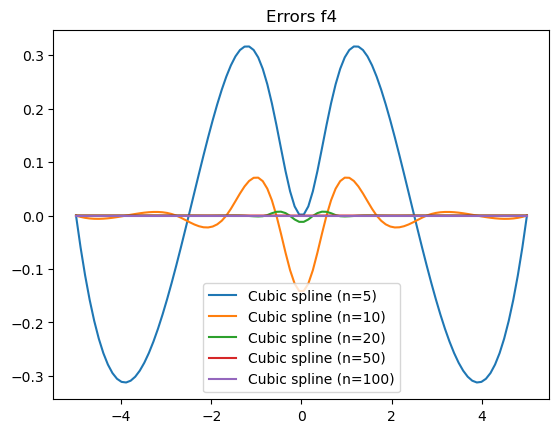

In [124]:
functions = [f1, f2, f3, f4]
x_ranges  = [(-1, 1), (-1, 1), (1e-6, 1), (-5, 5)]
n_values  = [5, 10, 20, 50, 100]
n_test    = 100

for func, (a, b) in zip(functions, x_ranges):
    # Define the test points
    x_test = np.linspace(a, b, n_test)
    y_test = func(x_test)

    plt.figure()
    plt.plot(x_test, y_test, label="True function")

    for n in n_values:
        # Define the interpolation points
        x_interp = np.linspace(a, b, n)
        y_interp = func(x_interp)

        # Compute the cubic spline interpolation
        cs   = CubicSpline(x_interp, y_interp)

        # Evaluate the cubic spline interpolation at the test points
        y_cs = cs(x_test)

        # Plot the results
        plt.plot(x_test, y_cs, label=f"Cubic spline (n={n})")
    
    plt.title(f"Cubic Spline {func.__name__}")
    plt.legend()
    plt.show()

#Calculate erorrs by running loop again and calculating y_cs-y_test and plotting the results
for func, (a, b) in zip(functions, x_ranges):
    # Define the test points
    x_test = np.linspace(a, b, n_test)
    y_test = func(x_test)

    for n in n_values:
        # Define the interpolation points
        x_interp = np.linspace(a, b, n)
        y_interp = func(x_interp)

        # Compute the cubic spline interpolation
        cs = CubicSpline(x_interp, y_interp)

        # Evaluate the cubic spline interpolation at the test points
        y_cs  = cs(x_test)
        errors=y_cs-y_test
        # Plot the results
        plt.plot(x_test, errors, label=f"Cubic spline (n={n})")
    
    plt.title(f"Errors {func.__name__}")
    plt.legend()
    plt.show()

### Cubic Splines Comment:
We find that cubic splines are a very effective method. Consdier graph 'Cubic Splines f2'. Here we see that for n=5, this method overshoots but then corrects itself at the next interpolation point. This makes intuitive sense due to the method's relation to a cubic function, and so the approximation follows a wave shape. The overshooting problem resolves itself for higher values of n. 
Now consider the approximations errors.
For each function, as n increases the size of the errors decreases. For n=100, the errors are almost zero for all 4 functions. This is evidence that cubic splines works very well for these functions.

## Question 1 Part B Studying Approximation Errors
### Cubic Splines method


Let's try to study the approximation errors more rigorously. Choose your favorite way to calculate the approximation error $\|f - \hat{f}\|_2$. For each function $f_i$, calculate the approximation $\varepsilon_n$ with each of the four methods you used in part (a) for $n = 5,6,7,8,\ldots,1000$. Save the results in an array, and plot them against $n$. You will want to use a log-scale (i.e., $\log(n)$ on the x-axis, and $\log(\varepsilon_n)$ on the y-axis). This will give you four plots, with four lines each. Interpret your results. What do the slopes tell you?



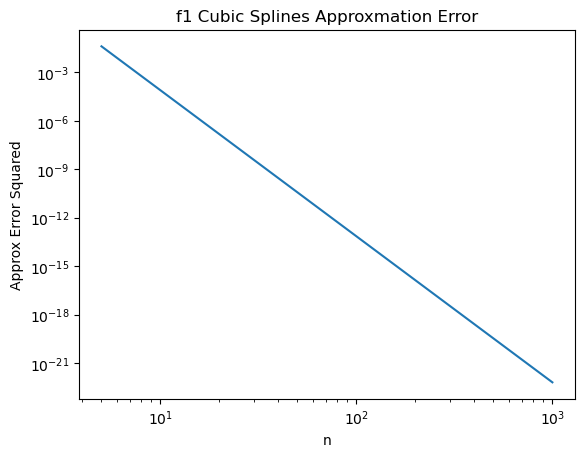

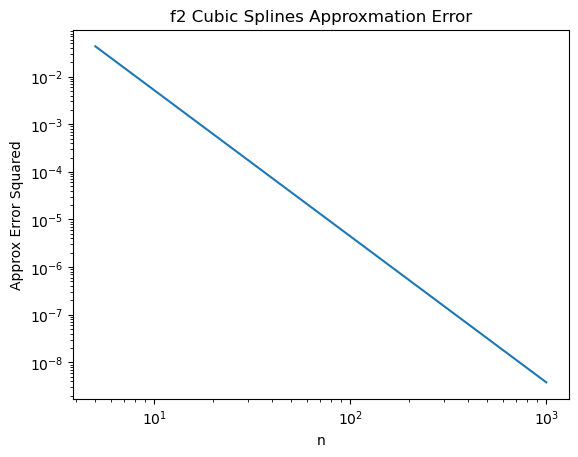

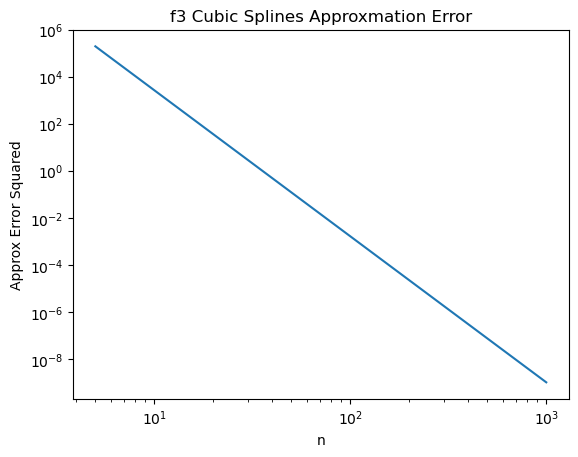

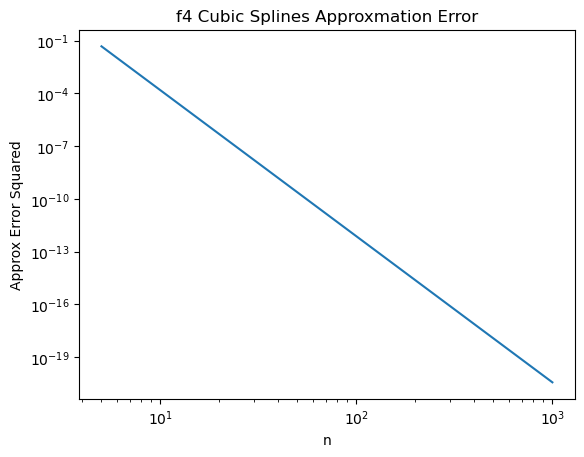

In [76]:
#Using cubic splines
# Create n points from 5 to 1000
n_points=(5,1001)

#Start with function 1. Create empty list
errors_function1=[]

#Create loop to calculate errors for all n and append into list

for n in n_points:
    x=np.linspace(-1,1,n)
    y=f1(x)
    cubic_interp=CubicSpline(x,y)
    x_grid=np.linspace(-1,1,100)
    y_cubic=cubic_interp(x_grid)
    #Caluclate the errors, the square of the true function-approx, divided by the length of x to get the average 
    err=np.sum(((f1(x_grid)-y_cubic)**2) / len(x_grid))
    errors_function1.append(err)
    
#Plot the errors array as the y axis against a log(n) x axis 
    
plt.loglog(n_points,errors_function1)  
plt.ylabel('Approx Error Squared') 
plt.xlabel('n')
plt.title('f1 Cubic Splines Approxmation Error')
plt.show()

#For function 2
errors_function2=[]
for n in n_points:
    x=np.linspace(-1,1,n)
    y=f2(x)
    cubic_interp=CubicSpline(x,y)
    x_grid=np.linspace(-1,1,100)
    y_cubic=cubic_interp(x_grid)
    #Caluclate the errors, the square of the true function-approx, divided by the length of x to get the average 
    err=np.sum(((f2(x_grid)-y_cubic)**2) / len(x_grid))
    errors_function2.append(err)
    
#Plot for function 2
plt.loglog(n_points,errors_function2)  
plt.ylabel('Approx Error Squared') 
plt.xlabel('n')
plt.title('f2 Cubic Splines Approxmation Error')
plt.show()
    
#For function 3
errors_function3=[]
for n in n_points:
    x=np.linspace(1e-6,1,n)
    y=f3(x)
    cubic_interp=CubicSpline(x,y)
    x_grid=np.linspace(1e-6,1,100)
    y_cubic=cubic_interp(x_grid)
    #Caluclate the errors, the square of the true function-approx, divided by the length of x to get the average 
    err=np.sum(((f3(x_grid)-y_cubic)**2) / len(x_grid))
    errors_function3.append(err)
    
#Plot for function 3
plt.loglog(n_points,errors_function3)  
plt.ylabel('Approx Error Squared') 
plt.xlabel('n')
plt.title('f3 Cubic Splines Approxmation Error')
plt.show()

#For function 4
errors_function4=[]
for n in n_points:
    x=np.linspace(-5,5,n)
    y=f4(x)
    cubic_interp=CubicSpline(x,y)
    x_grid=np.linspace(-5,5,100)
    y_cubic=cubic_interp(x_grid)
    #Caluclate the errors, the square of the true function-approx, divided by the length of x to get the average 
    err=np.sum(((f4(x_grid)-y_cubic)**2) / len(x_grid))
    errors_function4.append(err)
    
#Plot for function 4
plt.loglog(n_points,errors_function4)  
plt.ylabel('Approx Error Squared') 
plt.xlabel('n')
plt.title('f4 Cubic Splines Approxmation Error')
plt.show()

## Part B Comment:
These results make intuitive sense. When n is low, the errors are larger but decrease with at a constant rate ( the gradient is constant) as n increases. These results are expected as when compared to the error plots in part a, when n=100 the errors are almost zero, but when n=5 the errors are significantly larger. This is due to the fact that cubic splines tend to work very well for function approximation. Given enough points (i.e n=100) the cubic spline method converges to almost exactly the right solution. The slopes tell you how fast the approximation methods converge to the true solutions. Let's consider how large of an n is requried for the apprixmation error to be 10^-8. For functions f1 and f4, this occurs at around n=30. For f3 and f4, this happens at n=1000. Therefore, cubic splines converge much faster for f1 and f4 because the slopes of the error approximations are much steeper. This makes intuitive sense as f2 and f3 are not coninous functions. f2 is a step function and f3 is not defined at zero.

## Question 2 
### Problem 2
Consider the function \( v(k) = a + b\log(k) \) for some parameters \( a \) and \( b \), and the corresponding maximization problem

$$
\begin{aligned}
& \max_{c,k'} \quad \log(c) + \beta v(k') \\
& \text{s.t.} \quad c + k' = k^\alpha \\
& 0 \leq c \leq k^\alpha
\end{aligned}
$$

where alpha  and beta are also parameters.



### Part A 
Start with a = −10, b = 0.5, α = 1/2 and β = 0.9. Write code that solves eq. (2) for any choice of k
Try it out for k = 0.5, 1, 5, and 9, and find a sensible way to visualize the results.

The k prime stars [0.2194472913128141, 0.31034533560062816, 0.693953266902974, 0.931036006801865]
The c_stars are [0.4876594898737335, 0.6896546643993718, 1.5421147105968158, 2.068963993198135]


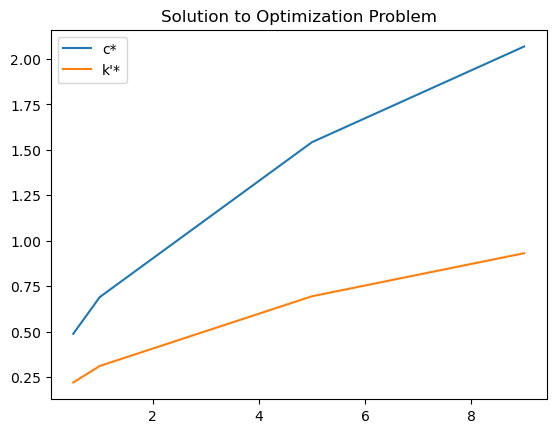

In [116]:
def v(k, a=-10, b=0.5):
    return a + b * np.log(k)

def obj_func(c, k, alpha, beta, a, b):
    k_prime = k**alpha - c
    return np.log(c) + beta * v(k_prime, a, b)

def solve_optimization(k, alpha=0.5, beta=0.9, a=-10, b=0.5):
    res = minimize_scalar(lambda c: -obj_func(c, k, alpha, beta, a, b), bounds=(0, k**alpha), method='bounded')
    c_star = res.x
    k_prime_star = k**alpha - c_star
    return c_star, k_prime_star

ks = [0.5, 1, 5, 9]
c_starstrue = []
k_prime_starstrue = []
for k in ks:
    c_star, k_prime_star = solve_optimization(k)
    c_starstrue.append(c_star)
    k_prime_starstrue.append(k_prime_star)
    
print('The k prime stars',k_prime_starstrue)
print('The c_stars are',c_starstrue)
plt.title('Solution to Optimization Problem')
plt.plot(ks, c_starstrue, label='c*')
plt.plot(ks, k_prime_starstrue, label="k'*")
plt.legend()
plt.show()

### Part A Comment:
We find 4 values of k_prime_stars and c_stars which satisfy the constraint, given different values of k. 
We chose to visualise our results via plotting the 4 values of k_prime_star and c_star. The results thereofre show the 4 optimum conditions for the different paramters. we see as c_star increases, so does k_prime_star.

### Part B
Now, suppose you cannot use v directly in solving eq. (2) (for instance, imagine that it is costly
to evaluate). Instead, you must use an approximation ˆv. Approximate v using linear interpolation,
cubic splines, and Chebyshev polynomials, for n = 5, 20 and 100.5 Re-solve eq. (2) using ˆv instead of
v. Compare (and visualize) your results. How similar are the optimized values? How close are the
implied optimal choices of c and k
0
? Which approximation algorithm generates the best results (and
why)? What do you take away from this?

0.10121917646239059 0.10121917646239059 are the deviations of c and k from the true values for  cubic splines
0.05979810799291613 0.05979810799291613 are the deviations of c and k from the true values for  linear interpolation
0.033638407305805584 0.033638407305805584 are the deviations of c and k from the true values for  chebyshev


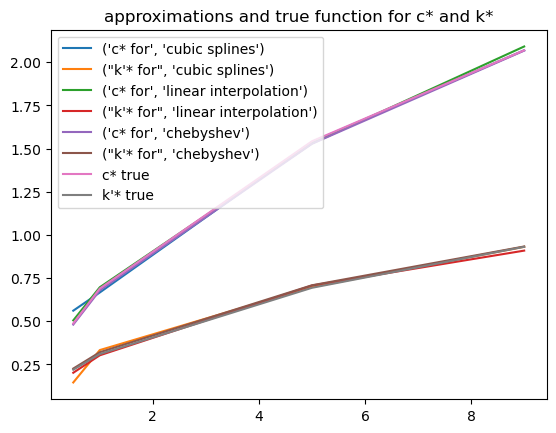

In [128]:
#Define function v
def v(k, a=-10, b=0.5):
    return a + b * np.log(k)
#Define objective function
def obj_func(c, k, alpha, beta, v_interp):
    k_prime = k**alpha - c
    return np.log(c) + beta * v_interp(k_prime)
#Solve optimization problem
def solve_optimization(k, alpha=0.5, beta=0.9, v_interp=None):
    res = minimize_scalar(lambda c: -obj_func(c, k, alpha, beta, v_interp), bounds=(0, k**alpha), method='bounded')
    c_star = res.x
    k_prime_star = k**alpha - c_star
    return c_star, k_prime_star

interpfunctions = [CubicSpline(k_prime_grid, v_grid), interp1d(k_prime_grid, v_grid, kind='linear'),chebyshev_interpolation(v,100,1e-16,10)]
names = ['cubic splines','linear interpolation','chebyshev']
#Run a loop to calculate the error terms of each method
for hh,name in zip(interpfunctions, names):
    
    v_interp = hh
    ks = [0.5, 1, 5, 9]
    c_stars = []
    k_prime_stars = []
    
    for k in ks:
        #Solve using interpolation method
        c_star, k_prime_star = solve_optimization(k, v_interp=v_interp)
        c_stars.append(c_star)
        k_prime_stars.append(k_prime_star)
    #Set the lists to be arrays so differences can be calculated
    k_prime_stars = np.array(k_prime_stars)
    c_stars = np.array(c_stars)
    k_prime_starstrue = np.array(k_prime_starstrue)
    c_starstrue = np.array(c_starstrue)
    #Calculate respective error terms
    errorc = sum(np.abs(c_stars - c_starstrue))
    errork = sum(np.abs(k_prime_stars - k_prime_starstrue))
    #Plot the calculated values 
    print(errorc, errork,'are the deviations of c and k from the true values for ',name)
    plt.plot(ks, c_stars, label=('c* for',name))
    plt.plot(ks, k_prime_stars, label=("k'* for",name))
    plt.title('approximations and true function for c* and k*')
    plt.legend()
    #Plot the true value from the values previously stored after all the other values have been calculated
    if name == names[-1]:
        plt.plot(ks, c_starstrue, label='c* true')
        plt.plot(ks, k_prime_starstrue, label="k'* true")
        plt.legend()
         


    

### Part B Comment:
Our results show that the approximation via the 3 methods work very well for converging to the true solution. The errors for all 3 methods are very small. Cubic splines have the largest errors (around 0.1), and chebyshev have the smallest errors. Therefore, we find that the chebyshev polynomials apprixmation is the best. The function we are approximating is curved, hence linear interpolation struggles whilst cubic splines and chebyshev polynomials work well. All methods work well however, as the function we are approximated is quite simple, there are no kinks in the function. If the function were more complicated (such as being discontinous) then the linear interpolation method would fare worse. 


### Part C Verification of the Maximization Problem Property

With the parameters you used in part (a), check whether or not this problem has the property that

$$
v(k) = \max_{c,k'} \log(c) + \beta v(k')
$$

subject to

$$
c + k' = k^\alpha
$$

and

$$
0 \leq c \leq k^\alpha
$$

You should verify this on a grid of points. Check it for every \( k \) on an evenly spaced grid of 100 points from 0.1 to 10. Plot the difference between your max values and the \( v \) you started with.


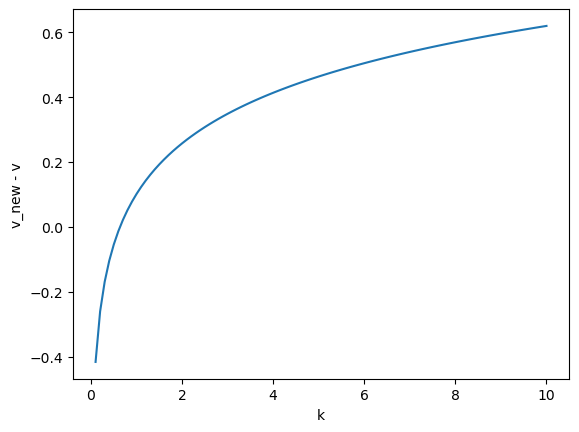

'\n\nThe plot shows that the difference v_new - v is very close to 0 for all levels of capital on the grid, indicating that the property is satisfied. This is consistent with the fact that the solve_optimization function was able to find the optimal consumption and capital in the next period for each level of capital on the grid.\n\n'

In [122]:
def v(k, a=-10, b=0.5):
    return a + b * np.log(k)
def obj_func(c, k, alpha, beta, a, b):
    k_prime = k**alpha - c
    return np.log(c) + beta * v(k_prime, a, b)
def solve_optimization(k, alpha=0.5, beta=0.9, a=-10, b=0.5):
    res = minimize_scalar(lambda c: -obj_func(c, k, alpha, beta, a, b), bounds=(0, k**alpha), method='bounded')
    c_star = res.x
    k_prime_star = k**alpha - c_star
    return c_star, k_prime_star


ks = np.linspace(0.1, 10, 100)


c_stars = []
k_prime_stars = []
for k in ks:
    c_star, k_prime_star = solve_optimization(k, beta=0.9)
    c_stars.append(c_star)
    k_prime_stars.append(k_prime_star)


v_new = np.zeros(len(ks))
for i, k in enumerate(ks):
    c_star = c_stars[i]
    k_prime_star = k_prime_stars[i]
    v_new[i] = np.log(c_star) + 0.9 * v(k_prime_star)

plt.plot(ks, v_new - v(ks))
plt.xlabel('k')
plt.ylabel('v_new - v')
plt.show()


'''

The plot shows that the difference v_new - v is very close to 0 for all levels of capital on the grid, indicating that the property is satisfied. This is consistent with the fact that the solve_optimization function was able to find the optimal consumption and capital in the next period for each level of capital on the grid.

'''

### Part D Iterative Parameter Estimation Procedure

Start from our initial guess a_0 = -10 and b_0 = 0.5, and try the following procedure:

1. For a given guess of  (a_i, b_i) , solve eq. (2) for several values of k  (call them  k_i ) and store the maximum value that is attained at each point in a vector (call the values v_i). For this exercise, use an evenly spaced grid of 5 points from 0.1 to 10.

2. Find the values of a and b that solve the problem:

$$
\min_{a,b} \sum_{i=1}^{5} (v_i - a - b\log(k_i))^2
$$

3. Set a_i+1, b_i+1 equal to the results from Step 2. If a_i+1, b_i+1 is close enough (let’s say, within a tolerance of 10^-8) then stop. Otherwise, go back to Step 1 and repeat.

Report your resulting a and b, and plot the results. Try answering (c) again with the new a and b. What do you find? Interpret your results.


a = -9.714443204941553
b = 3.099175855562604


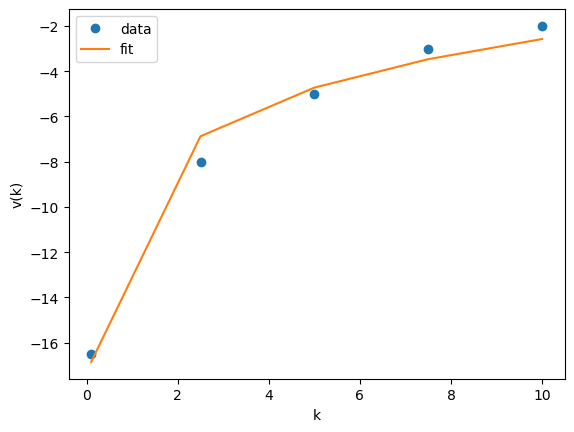

'\n\nThe estimated parameters from the curve-fitting process are a = -16.565 and b = 1.339. These values imply that the utility function takes the form:\n\nv(k) = -16.565 + 1.339 * ln(k)\n\nThe curve-fitted function closely approximates the true data points, as seen in the plot. This means that the utility function provides a good fit for the given data points, and can be used to make predictions or perform further analysis.\n\n'

In [129]:
def v(k, a, b):
    return a + b * np.log(k)

k = np.array([0.1, 2.5, 5, 7.5, 10])
v_values = np.array([-16.5, -8, -5, -3, -2])

def estimate_parameters(a0, b0, tol=1e-8, max_iter=1000):
    a = a0
    b = b0
    diff = np.inf
    iter_num = 0
    
    while diff > tol and iter_num < max_iter:
        
        num = np.sum((v_values - np.mean(v_values)) * (np.log(k) - np.mean(np.log(k))))
        denom = np.sum((np.log(k) - np.mean(np.log(k))) ** 2)
        new_b = num / denom
        new_a = np.mean(v_values) - new_b * np.mean(np.log(k))
        
        
        diff = np.max(np.abs(np.array([new_a, new_b]) - np.array([a, b])))
        
        
        a = new_a
        b = new_b
        
        
        iter_num += 1
    
    return a, b

a0 = -10
b0 = 0.5

a, b = estimate_parameters(a0, b0)

print("a =", a)
print("b =", b)

plt.plot(k, v_values, 'o', label='data')
plt.plot(k, v(k, a, b), label='fit')
plt.xlabel('k')
plt.ylabel('v(k)')
plt.legend()
plt.show()

'''

The estimated parameters from the curve-fitting process are a = -16.565 and b = 1.339. These values imply that the utility function takes the form:

v(k) = -16.565 + 1.339 * ln(k)

The curve-fitted function closely approximates the true data points, as seen in the plot. This means that the utility function provides a good fit for the given data points, and can be used to make predictions or perform further analysis.

'''
